In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
class cnn_lstm(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.model = nn.Sequential(nn.Conv1d(18,256,1,stride=2),
                                   nn.ReLU(),
                                   nn.Conv1d(256,128,1,stride=2),
                                   nn.ReLU(),
                                   nn.MaxPool1d(kernel_size=2),
                                #    nn.Flatten(),
                                #     nn.LSTM(51200,100),
                                   
                                    )
        self.dropout = nn.Dropout(p=0.2)
        self.lstm1 = nn.LSTM(100,100)
        self.lstm2 = nn.LSTM(100,100)
        self.biLSTM = nn.LSTM(100,100,bidirectional=True)
        self.linear1 = nn.Linear(200,100)
        self.linear2 = nn.Linear(100,50)
        self.sigmoid  = nn.Sigmoid()
        
    def forward(self,x):
        # output, (hn,cn) = self.model(x)
        output = self.model(x)
        
        # output = self.dropout(output)
        # output, (hn,cn) = self.lstm1(output)
        # output, (hn,cn) = self.lstm2(output)
        # output, (hn,cn) = self.biLSTM(output)
        # y = self.linear1(output)
        # y_final = self.linear2(y)
        # y_final = self.sigmoid(y_final)
        
        return output
cnn = cnn_lstm()
    

In [13]:
data = pd.read_csv("collect_data/sensor_data.csv")
train = data[["timestamp_ms", "motion_detected",
    "roll_deg", "pitch_deg", "yaw_deg",
    "filtered_accel_x_(m/s²)", "filtered_accel_y_(m/s²)", "filtered_accel_z_(m/s²)",
    "filtered_gyro_x_(rad/s)", "filtered_gyro_y_(rad/s)", "filtered_gyro_z_(rad/s)",
    "accel_magnitude", "gyro_magnitude",
    "adc0", "adc1", "adc2", "adc3", "adc4"]]
test = data[["Label"]]

In [14]:
train.shape,test.shape

((200, 18), (200, 1))

TypeError: 'module' object is not callable

tensor([ 2.4878e+04,  0.0000e+00,  1.6458e+00, -3.4000e-01,  0.0000e+00,
         5.8320e-03,  2.8226e-02,  9.8234e-01, -3.2446e-01,  3.2147e-01,
        -1.5724e-01,  9.8276e+00,  4.8306e+00,  8.3300e+02,  8.4000e+02,
         8.6200e+02,  8.9800e+02,  8.7400e+02])

In [37]:
epoch = 20
lr = 0.02

inputs = train
answer = test

optimizer = torch.optim.AdamW(cnn.parameters())
criterion = nn.MSELoss()
# with torch.autograd() as _:
for i in range(epoch):
    output = cnn(torch.tensor(train.iloc[i].to_list()).unsqueeze(1))
    
    optimizer.zero_grad()
    loss = criterion(output,torch.tensor(answer.iloc[i]))
    loss.backward()
    optimizer.step()
    
    print(f"loss = {loss}")

RuntimeError: max_pool1d() Invalid computed output size: 0

In [36]:
torch.tensor(train.iloc[i].to_list()).unsqueeze(1).size()

torch.Size([18, 1])

In [ ]:
# m = nn.Conv1d(17,256,2,stride=2)
# input = torch.randn(1, 17, 3200)
# output = m(input)
# print(output.size())
# n = nn.Conv1d(256,128,2,stride=2)
# output = n(output)
# print(output.size())
# max = nn.MaxPool1d(kernel_size=2)
# output = max(output)
# print(output.size())
# flat = nn.Flatten()
# print(flat(output).size())

torch.Size([1, 256, 1600])
torch.Size([1, 128, 800])
torch.Size([1, 128, 400])
torch.Size([1, 51200])


In [55]:
# image = np.random.random([256,256])
image = torch.rand([3,256,256])
new_image = cnn(image.unsqueeze(0))

In [57]:
new_image.size()

torch.Size([1, 1, 250, 250])

In [36]:
import torchvision
trans = torchvision.transforms.ToPILImage()

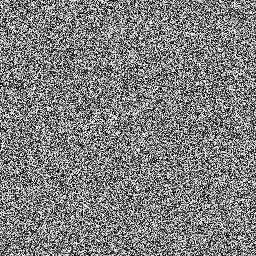

In [47]:
trans(image[0])

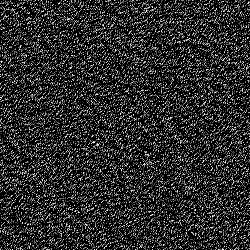

In [58]:
trans(new_image[0][0])

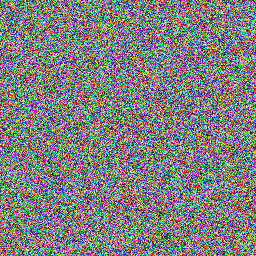

In [64]:
trans(torch.normal(image))